

#Project Title: Forecasting Inventory of Steel Rods



**Business Problem:**Company maintainance costs are increasing due to lack of proper planning









**Business Objectives:** Minimize inventory cost . Maximize the Balancing the trade of goods.    

**Business Constraints:** Increasing customer service 

**Success Criteria:**


**Business Success Criteria:** To reduce inventory cost by 30%

**ML Success Criteria:**To achieve error less than 5%

**Economic Success Criteria:** To Increase business profit by 15%


In [109]:
## Importing Libraries

import pandas as pd   ## for Data Manipulation
import numpy as np    ## for Arthimetic Operations
import matplotlib.pyplot as plt ## for Data Visaulaizations
import seaborn as sns ## for Advanced Data Visaulaizations
import scipy.stats as stats  ## for Scientific Calculations

In [110]:
## Reading the file from location machine using Pandas Library

df = pd.read_csv(r"/content/drive/MyDrive/TMT_Rods_dataset.csv")

df   ## Reading the first 5 columns

,Date,Time,Location,Sales in Rs/T,Sales volume in Tonnes,Price/ kg,Climate,Customer ID,Diameter,Length,Grade,Current stock,Re-order,Lead time,Production time,Units Produced,Production cost
0,14-10-1995,11:08 AM,Pune,424440.0,7.07,60.0,Rainy,C9D3791C,32.0,13,Fe-500,10770,618,7,3,14828,18734
1,15-10-1995,10:07 AM,Hyderabad,426000.0,8.35,51.0,Rainy,F515841D,12.0,7,Fe-415,8039,1195,2,3,12795,21294
2,16-10-1995,5:25 PM,Kolkata,429360.0,6.82,63.0,Rainy,B387F82E,12.0,9,Fe-500D,7328,1372,14,6,13576,19759
3,17-10-1995,10:00 AM,Bengaluru,432000.0,6.86,63.0,Rainy,A8EBB29A,8.0,25,Fe-550,3040,688,14,2,8060,23073
4,18-10-1995,4:39 PM,Delhi,432000.0,7.45,58.0,Rainy,DC1D8CD9,32.0,27,Fe-500,9011,704,11,6,7532,19986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24-02-2023,12:51 PM,Pune,509579.0,9.13,52.0,Winter,94CE748E,9.0,19,Fe-500D,3695,1206,14,6,7434,17790
9996,25-02-2023,11:08 AM,Delhi,612511.0,9.99,53.0,Winter,EE75A871,16.0,27,Fe-600D,7225,1492,8,4,10847,22642
9997,26-02-2023,5:19 PM,Kolkata,672718.0,8.84,70.0,Sunny,D3B1B31D,19.0,18,Fe-550D,12102,609,8,1,12405,23116
9998,27-02-2023,3:32 PM,Kolkata,480401.0,7.64,66.0,Winter,1A6708FC,26.0,20,NaN,13109,805,5,7,13980,19983


In [111]:
df.shape

(10000, 17)

In [112]:
#push the data into sql
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import joblib
import pickle

In [113]:
engine = create_engine('sqlite:///TMTrods_database.db')

In [114]:
#insert the dataframe into the database 
df.to_sql(name ='steelrods_dataset',con=engine,if_exists='replace', index=False)


10000

In [115]:
#fetch the table to verify 
#connect to the database 
conn = sqlite3.connect('TMTrods_database.db')
cursor =conn.cursor()

In [116]:
#Execute the 'show tables ' command
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

In [117]:
#Fetch all the results
tables = cursor.fetchall()

In [118]:
#print the results 
for table in tables:
    print(table)

('steelrods_dataset',)


In [119]:
#Close the conncetion 
conn.close()

In [120]:
#connect the database 
conn = sqlite3.connect("TMTrods_database.db")
cursor = conn.cursor()

In [121]:
#define the name of the table to retrieve
table ='steelrods_dataset'

In [122]:
#retrieve the data from the table 
cursor.execute(f"SELECT * FROM {table}")
data = cursor.fetchall()

In [123]:
#create a data frame the retrieve data 
rods_data =pd.DataFrame(data)

In [124]:
#close connection 
conn.close()

In [125]:
#print the dataframe 
rods_data.columns=['Date', 'Time', 'Location', 'Sales_in_Rs/T', 'Sales_volume', 'Price/kg',
       'Climate', 'Customer_ID', 'Diameter', 'Length', 'Grade',
       'Current_stock', 'Re-order', 'Lead_time', 'Production_time',
       'Units_Produced', 'Production_cost']
rods_data

,Date,Time,Location,Sales_in_Rs/T,Sales_volume,Price/kg,Climate,Customer_ID,Diameter,Length,Grade,Current_stock,Re-order,Lead_time,Production_time,Units_Produced,Production_cost
0,14-10-1995,11:08 AM,Pune,424440.0,7.07,60.0,Rainy,C9D3791C,32.0,13,Fe-500,10770,618,7,3,14828,18734
1,15-10-1995,10:07 AM,Hyderabad,426000.0,8.35,51.0,Rainy,F515841D,12.0,7,Fe-415,8039,1195,2,3,12795,21294
2,16-10-1995,5:25 PM,Kolkata,429360.0,6.82,63.0,Rainy,B387F82E,12.0,9,Fe-500D,7328,1372,14,6,13576,19759
3,17-10-1995,10:00 AM,Bengaluru,432000.0,6.86,63.0,Rainy,A8EBB29A,8.0,25,Fe-550,3040,688,14,2,8060,23073
4,18-10-1995,4:39 PM,Delhi,432000.0,7.45,58.0,Rainy,DC1D8CD9,32.0,27,Fe-500,9011,704,11,6,7532,19986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24-02-2023,12:51 PM,Pune,509579.0,9.13,52.0,Winter,94CE748E,9.0,19,Fe-500D,3695,1206,14,6,7434,17790
9996,25-02-2023,11:08 AM,Delhi,612511.0,9.99,53.0,Winter,EE75A871,16.0,27,Fe-600D,7225,1492,8,4,10847,22642
9997,26-02-2023,5:19 PM,Kolkata,672718.0,8.84,70.0,Sunny,D3B1B31D,19.0,18,Fe-550D,12102,609,8,1,12405,23116
9998,27-02-2023,3:32 PM,Kolkata,480401.0,7.64,66.0,Winter,1A6708FC,26.0,20,None,13109,805,5,7,13980,19983


In [126]:
# Droping the TIme and Customer ID columns  
rods_data = rods_data.drop(columns = ["Time", "Customer_ID"], axis = 1)

In [127]:
df_rename =df.rename({'Sales in Rs/T': 'Sales_in_Rs/T', 'Sales volume in Tonnes': 'Sales_volume','Price/ kg' :'Price/kg', 'Customer ID':'Customer_ID','Current stock':'Current_stock',
                 'Lead time':'Lead_time','Production time':'Production_time', 'Units Produced ':'Units_Produced','Production cost':"Production_cost"}, axis=1, inplace=True)

In [128]:
df.columns

Index(['Date', 'Time', 'Location', 'Sales_in_Rs/T', 'Sales_volume', 'Price/kg',
       'Climate', 'Customer_ID', 'Diameter', 'Length', 'Grade',
       'Current_stock', 'Re-order', 'Lead_time', 'Production_time',
       'Units_Produced', 'Production_cost'],
      dtype='object')

In [129]:
df.shape

(10000, 17)

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_Rs/T,9992.0,541320.140112,75223.368004,4158.0,481218.00,536157.00,594403.75,717230.0
Sales_volume,9992.0,8.546244,1.531126,4.1,7.38,8.43,9.57,15.6
Price/kg,9995.0,62.958179,6.472928,50.0,58.00,63.00,68.00,74.0
Diameter,9998.0,16.974995,6.467049,8.0,12.00,16.00,21.00,32.0
Length,10000.0,17.930300,8.123869,4.0,11.00,18.00,25.00,32.0
Current_stock,10000.0,8991.488900,3420.646321,3003.0,6045.75,9080.00,11919.50,14989.0
Re-order,10000.0,999.154800,285.957747,502.0,753.00,999.00,1245.00,1500.0
Lead_time,10000.0,8.011000,4.049953,1.0,5.00,8.00,11.00,15.0
Production_time,10000.0,4.035200,1.783726,1.0,3.00,4.00,6.00,7.0
Units_Produced,10000.0,10921.567000,2288.349041,6017.0,8957.75,10886.50,12883.00,15800.0


In [131]:
numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns
numeric_features

Index(['Sales_in_Rs/T', 'Sales_volume', 'Price/kg', 'Diameter', 'Length',
       'Current_stock', 'Re-order', 'Lead_time', 'Production_time',
       'Units_Produced', 'Production_cost'],
      dtype='object')

In [132]:
categorical_features = df.select_dtypes(exclude = ['int64', 'float64']).columns
categorical_features

Index(['Date', 'Time', 'Location', 'Climate', 'Customer_ID', 'Grade'], dtype='object')

In [133]:
results = []
for col in numeric_features:
    result = {
        'Feature': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode().tolist(),
        'Range': df[col].max() - df[col].min(),
        'Variance': df[col].var(),
        'Standard Deviation': df[col].std(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurtosis()
    }
    results.append(result)

EDA = pd.DataFrame(results)
display(EDA)

,Feature,Mean,Median,Mode,Range,Variance,Standard Deviation,Skewness,Kurtosis
0,Sales_in_Rs/T,541320.140112,536157.00,[433560.0],713072.0,5.658555e+09,75223.368004,0.086901,0.547886
1,Sales_volume,8.546244,8.43,"[7.92, 8.35]",11.5,2.344348e+00,1.531126,0.468308,-0.086608
2,Price/kg,62.958179,63.00,[62.0],24.0,4.189879e+01,6.472928,-0.159762,-1.006872
3,Diameter,16.974995,16.00,[10.0],24.0,4.182272e+01,6.467049,0.589913,-0.605864
4,Length,17.930300,18.00,[7],28.0,6.599724e+01,8.123869,0.015827,-1.201782
5,Current_stock,8991.488900,9080.00,"[3276, 5909, 10610]",11986.0,1.170082e+07,3420.646321,-0.015762,-1.184977
6,Re-order,999.154800,999.00,"[798, 913, 1181, 1247]",998.0,8.177183e+04,285.957747,0.005727,-1.173889
7,Lead_time,8.011000,8.00,[8],14.0,1.640212e+01,4.049953,0.002804,-1.159690
8,Production_time,4.035200,4.00,[6],6.0,3.181679e+00,1.783726,-0.037894,-1.091210
9,Units_Produced,10921.567000,10886.50,[10189],9783.0,5.236541e+06,2288.349041,0.031534,-1.180364


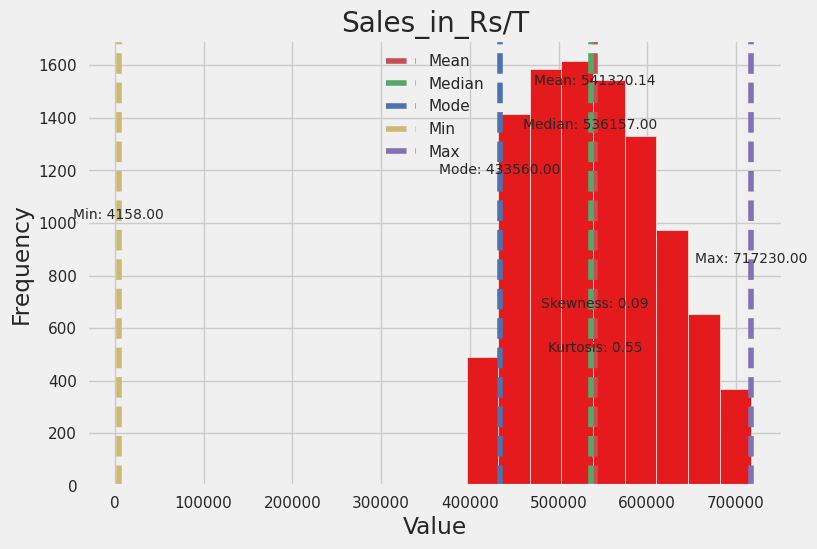

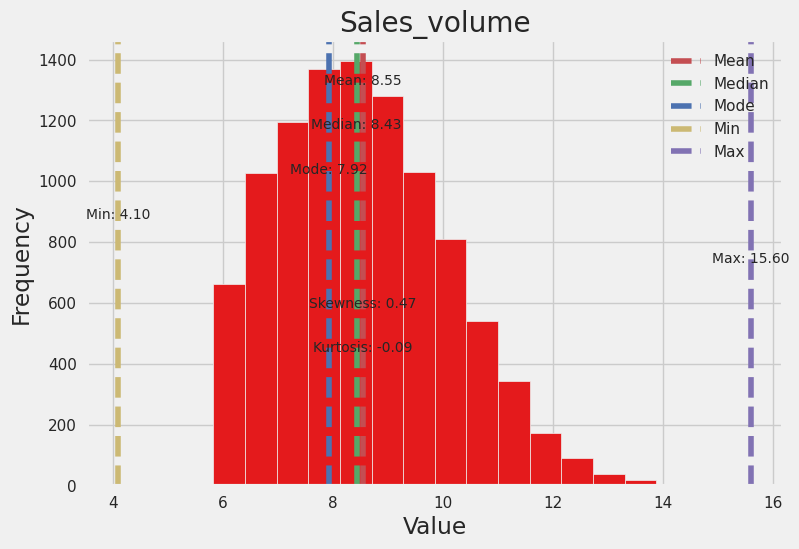

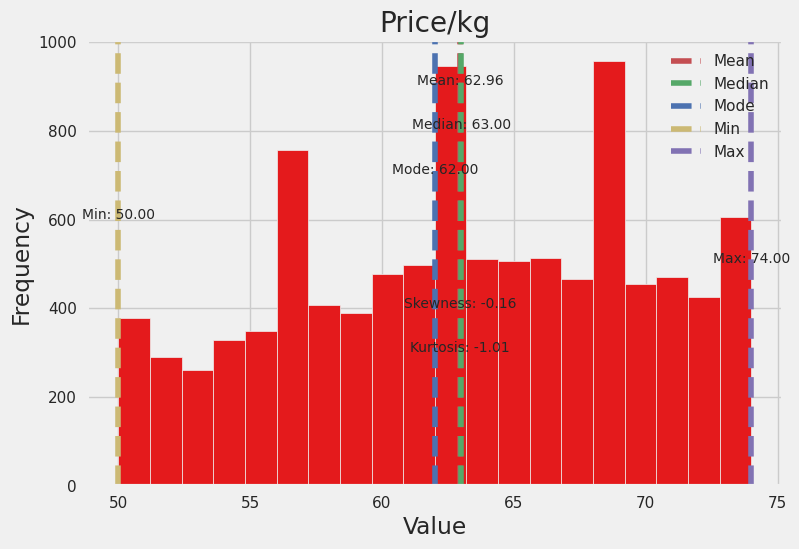

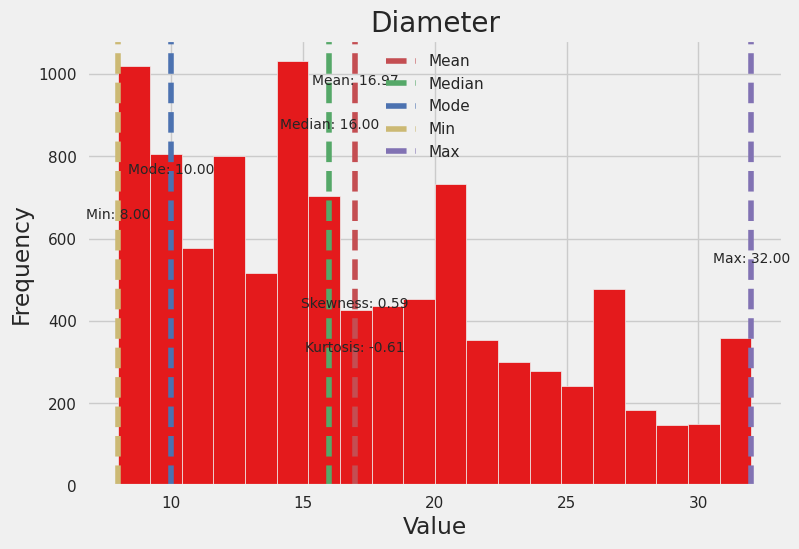

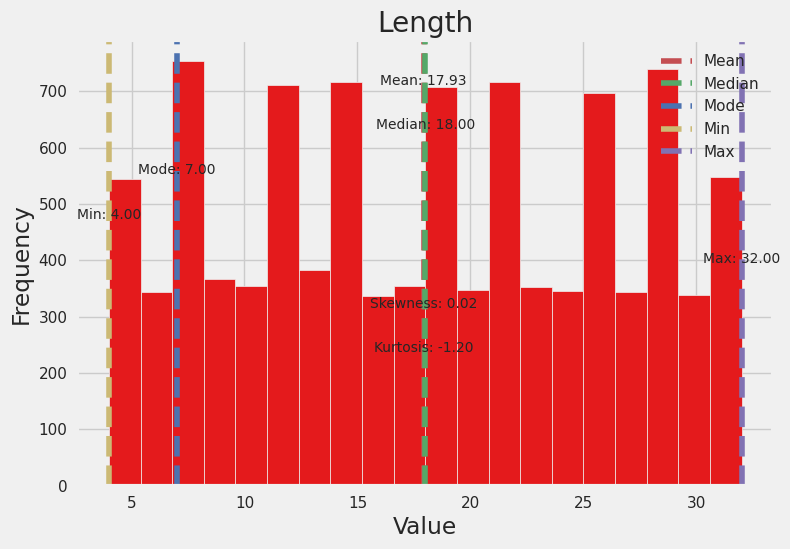

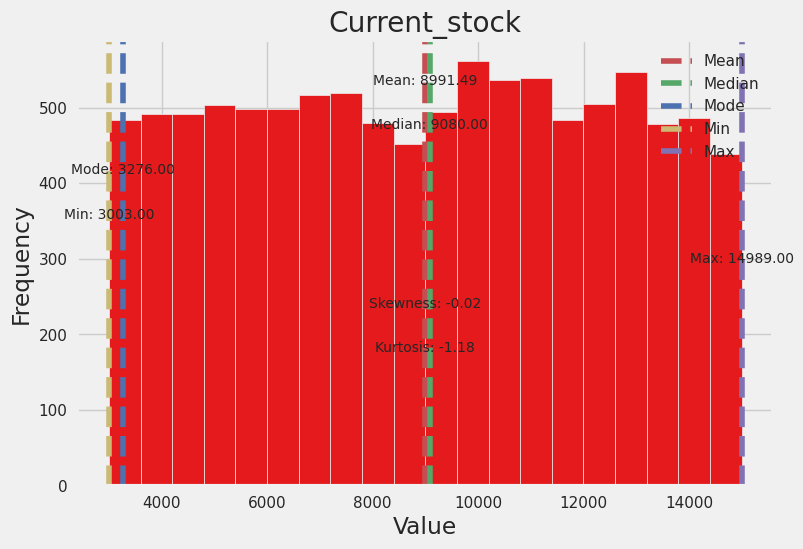

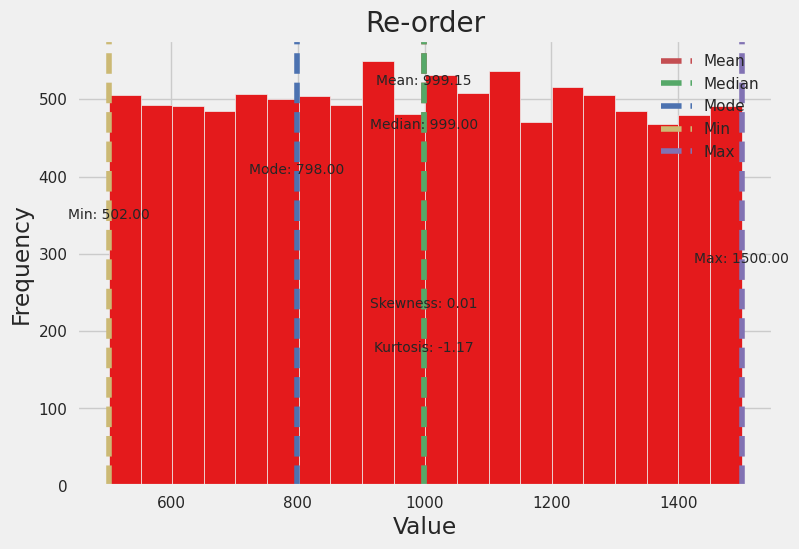

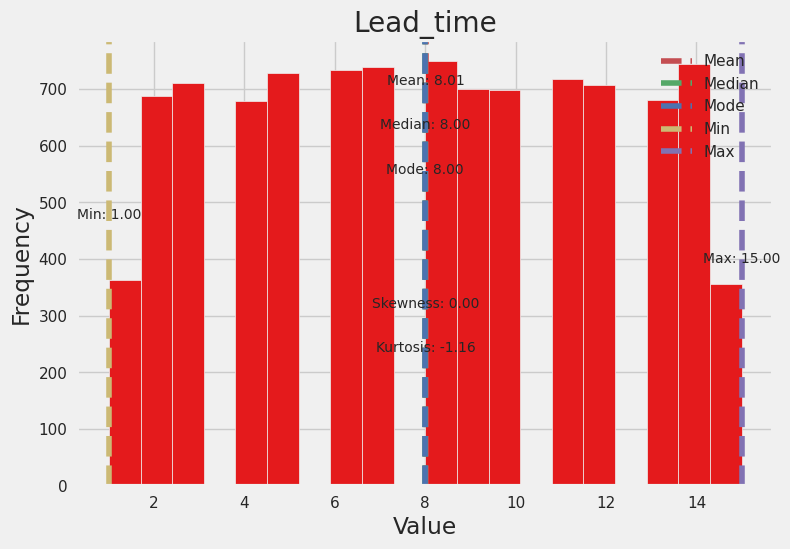

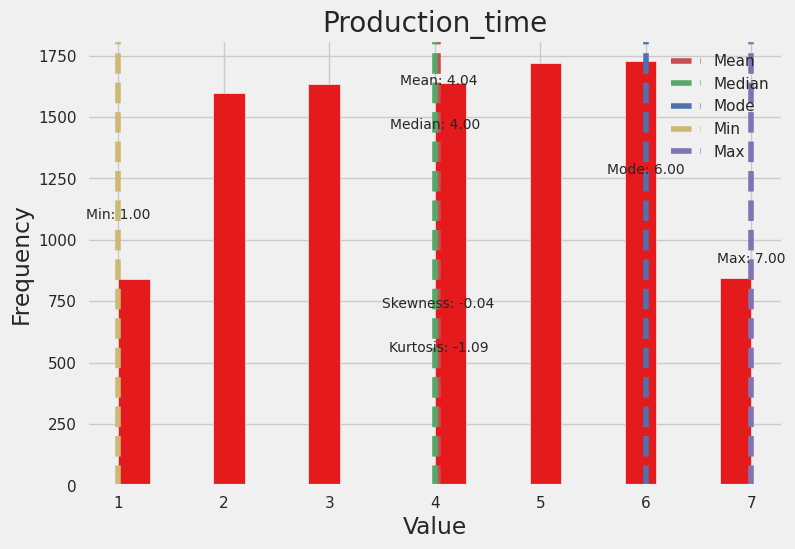

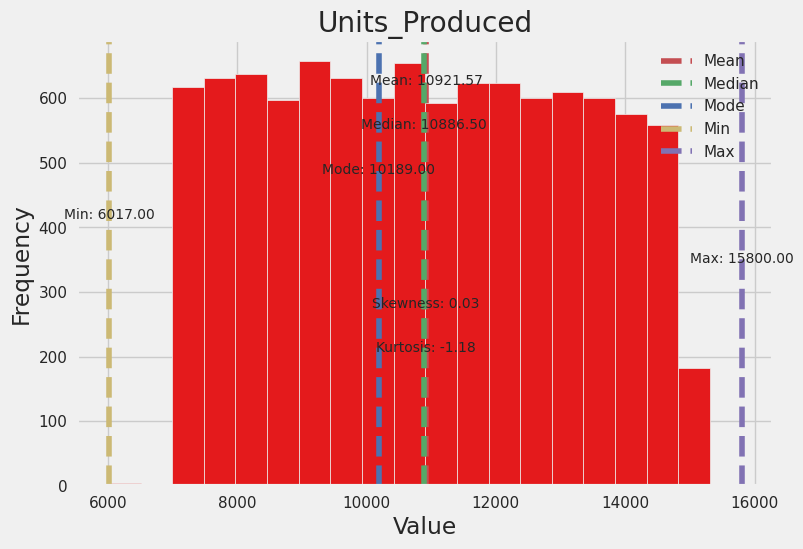

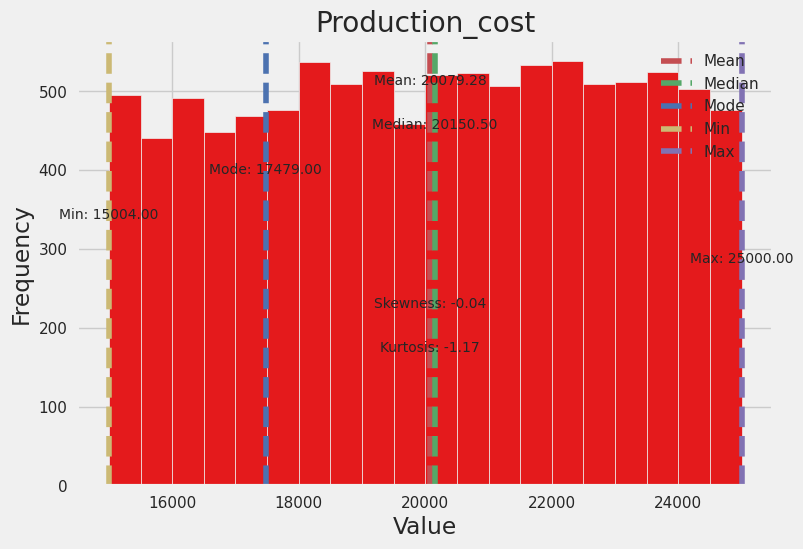

In [134]:
# Calculate Skewness and Kurtosis
Skewness = df.skew()
Kurtosis = df.kurtosis()



# Plot histograms and add labels
for column in numeric_features:
    fig, ax = plt.subplots()
    ax.hist(df[column], bins = 20)
    ax.axvline(df[column].mean(), color='r', linestyle='--', label='Mean')
    ax.axvline(df[column].median(), color='g', linestyle='--', label='Median')
    ax.axvline(df[column].mode()[0], color='b', linestyle='--', label='Mode')
    ax.axvline(df[column].min(), color='y', linestyle='--', label='Min')
    ax.axvline(df[column].max(), color='m', linestyle='--', label='Max')
    ax.legend()
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
    # Adding Mean, Median, Min, Max, Skewness, and Kurtosis values to the plot
    ax.text(df[column].mean(), ax.get_ylim()[1]*0.9, f'Mean: {df[column].mean():.2f}', ha='center', fontsize=10)
    ax.text(df[column].median(), ax.get_ylim()[1]*0.8, f'Median: {df[column].median():.2f}', ha='center', fontsize=10)
    ax.text(df[column].mode()[0], ax.get_ylim()[1]*0.7, f'Mode: {df[column].mode()[0]:.2f}', ha='center', fontsize=10)
    ax.text(df[column].min(), ax.get_ylim()[1]*0.6, f'Min: {df[column].min():.2f}', ha='center', fontsize=10)
    ax.text(df[column].max(), ax.get_ylim()[1]*0.5, f'Max: {df[column].max():.2f}', ha='center', fontsize=10)
    ax.text(df[column].mean(), ax.get_ylim()[1]*0.4, f'Skewness: {Skewness[column]:.2f}', ha='center', fontsize=10)
    ax.text(df[column].mean(), ax.get_ylim()[1]*0.3, f'Kurtosis: {Kurtosis[column]:.2f}', ha='center', fontsize=10)
    
plt.show()

In [135]:
## Converting a column of strings in object format to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date               datetime64[ns]
Time                       object
Location                   object
Sales_in_Rs/T             float64
Sales_volume              float64
Price/kg                  float64
Climate                    object
Customer_ID                object
Diameter                  float64
Length                      int64
Grade                      object
Current_stock               int64
Re-order                    int64
Lead_time                   int64
Production_time             int64
Units_Produced              int64
Production_cost             int64
dtype: object

In [136]:
df1=df.sort_values(by=['Date'])

In [137]:
df1.set_index("Date", inplace = True)
df1.head()

,Time,Location,Sales_in_Rs/T,Sales_volume,Price/kg,Climate,Customer_ID,Diameter,Length,Grade,Current_stock,Re-order,Lead_time,Production_time,Units_Produced,Production_cost
Date,,,,,,,,,,,,,,,,
1995-01-11,12:34 PM,NaN,447000.0,6.30,71.0,Rainy,26D8DB1B,32.0,29,Fe-600D,5909,754,3,7,10110,23504
1995-01-12,11:41 AM,Kolkata,455520.0,8.59,53.0,Rainy,01E88151,8.0,28,Fe-415,13783,886,5,5,13383,20141
1995-02-11,9:24 AM,Hyderabad,447960.0,6.49,69.0,Rainy,5388CFD0,32.0,11,Fe-600,11039,853,12,6,12195,18077
1995-02-12,3:34 PM,Hyderabad,454560.0,7.70,59.0,Rainy,A5734569,10.0,11,Fe-500,8370,1372,3,1,11359,20218
1995-03-11,11:18 AM,Kolkata,447960.0,7.00,64.0,Rainy,2E38BBE1,16.0,26,Fe-550,12894,848,1,6,13144,15857


In [138]:
df1.isnull().sum()

Time               11
Location            6
Sales_in_Rs/T       8
Sales_volume        8
Price/kg            5
Climate             9
Customer_ID         0
Diameter            2
Length              0
Grade               5
Current_stock       0
Re-order            0
Lead_time           0
Production_time     0
Units_Produced      0
Production_cost     0
dtype: int64

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import joblib
import pickle

In [140]:
# On the customer column of our data, impute the missing values with the LOCF
df1  = df1.fillna(method ='bfill')

In [141]:
df1.isnull().sum()

Time               0
Location           0
Sales_in_Rs/T      0
Sales_volume       0
Price/kg           0
Climate            0
Customer_ID        0
Diameter           0
Length             0
Grade              0
Current_stock      0
Re-order           0
Lead_time          0
Production_time    0
Units_Produced     0
Production_cost    0
dtype: int64

In [142]:
df1.duplicated().sum()


0

In [143]:
df1

,Time,Location,Sales_in_Rs/T,Sales_volume,Price/kg,Climate,Customer_ID,Diameter,Length,Grade,Current_stock,Re-order,Lead_time,Production_time,Units_Produced,Production_cost
Date,,,,,,,,,,,,,,,,
1995-01-11,12:34 PM,Kolkata,447000.0,6.30,71.0,Rainy,26D8DB1B,32.0,29,Fe-600D,5909,754,3,7,10110,23504
1995-01-12,11:41 AM,Kolkata,455520.0,8.59,53.0,Rainy,01E88151,8.0,28,Fe-415,13783,886,5,5,13383,20141
1995-02-11,9:24 AM,Hyderabad,447960.0,6.49,69.0,Rainy,5388CFD0,32.0,11,Fe-600,11039,853,12,6,12195,18077
1995-02-12,3:34 PM,Hyderabad,454560.0,7.70,59.0,Rainy,A5734569,10.0,11,Fe-500,8370,1372,3,1,11359,20218
1995-03-11,11:18 AM,Kolkata,447960.0,7.00,64.0,Rainy,2E38BBE1,16.0,26,Fe-550,12894,848,1,6,13144,15857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,4:04 PM,Pune,597303.0,10.22,68.0,Winter,B7F846A1,9.0,5,Fe-600,3365,667,9,1,12127,23338
2023-11-01,11:32 AM,Pune,452221.0,6.44,68.0,Sunny,111786F3,17.0,30,Fe-500,13691,588,10,3,12355,18617
2023-11-02,9:31 AM,Delhi,613579.0,9.32,61.0,Rainy,C3DBE609,29.0,5,Fe-600D,10901,1021,3,2,14163,24689


In [144]:
cols = ['Time','Customer_ID', 'Sales_in_Rs/T','Price/kg', 'Diameter', 'Length',
       'Current_stock', 'Re-order', 'Lead_time', 'Production_time',
       'Units_Produced', 'Production_cost', 'Location', 'Climate',
       'Grade']
data = df1.drop(cols, axis=1, inplace=True)

In [145]:
df1

,Sales_volume
Date,
1995-01-11,6.30
1995-01-12,8.59
1995-02-11,6.49
1995-02-12,7.70
1995-03-11,7.00
...,...
2023-10-02,10.22
2023-11-01,6.44
2023-11-02,9.32


In [146]:
#y = df1.loc['1996-01-01':'2022-12-31']


In [192]:
y = df1['Sales_volume'].resample('D').sum()
y

Date
1995-01-11    6.30
1995-01-12    8.59
1995-01-13    0.00
1995-01-14    0.00
1995-01-15    0.00
              ... 
2023-11-28    0.00
2023-11-29    0.00
2023-11-30    0.00
2023-12-01    9.48
2023-12-02    7.14
Freq: D, Name: Sales_volume, Length: 10553, dtype: float64

In [148]:
y.shape

(9862, 1)

In [149]:
clean_data = pd.DataFrame(y)
clean_data

,Sales_volume
Date,
1996-01-01,6.15
1996-01-02,6.38
1996-01-03,6.47
1996-01-04,7.47
1996-01-05,7.91
...,...
2022-12-27,6.62
2022-12-28,9.80
2022-12-29,10.80


In [150]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9862 entries, 1996-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales_volume  9862 non-null   float64
dtypes: float64(1)
memory usage: 154.1 KB


Shape of your Data Set loaded: (9862, 1)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Sales_volume,721,float64,0,0.000000,7.310890,0,


    1 Predictors classified...
        No variables removed since no ID or low-information variables found in data set


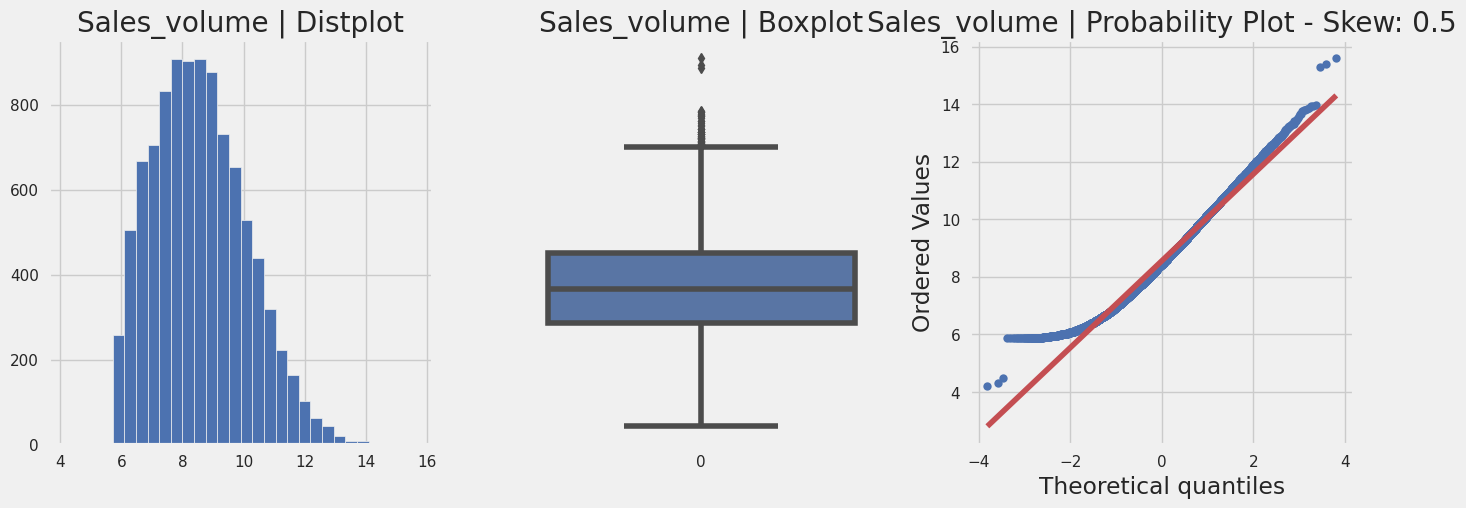

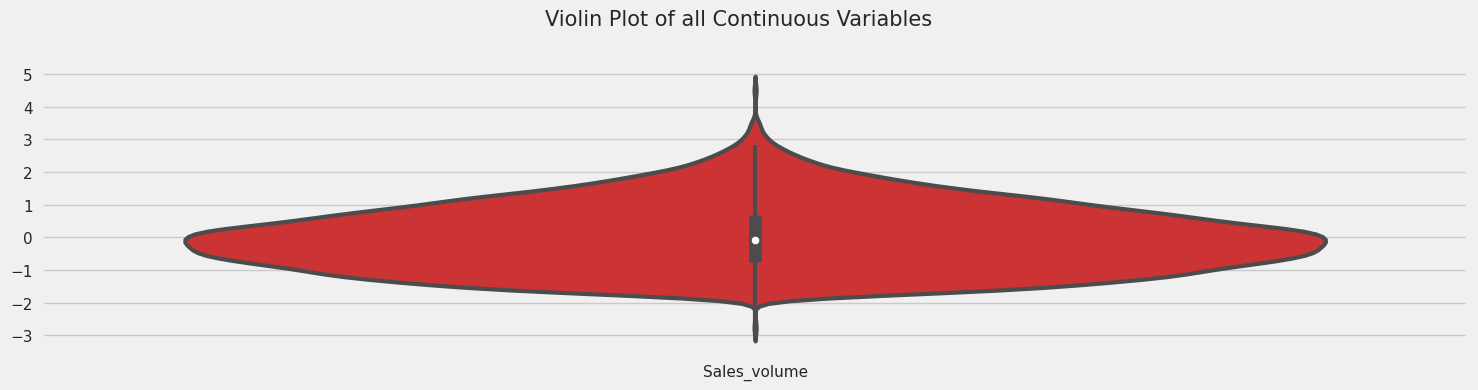

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Sales_volume
Date,
1996-01-01,6.15
1996-01-02,6.38
1996-01-03,6.47
1996-01-04,7.47
1996-01-05,7.91
...,...
2022-12-27,6.62
2022-12-28,9.80
2022-12-29,10.80


In [151]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=clean_data)

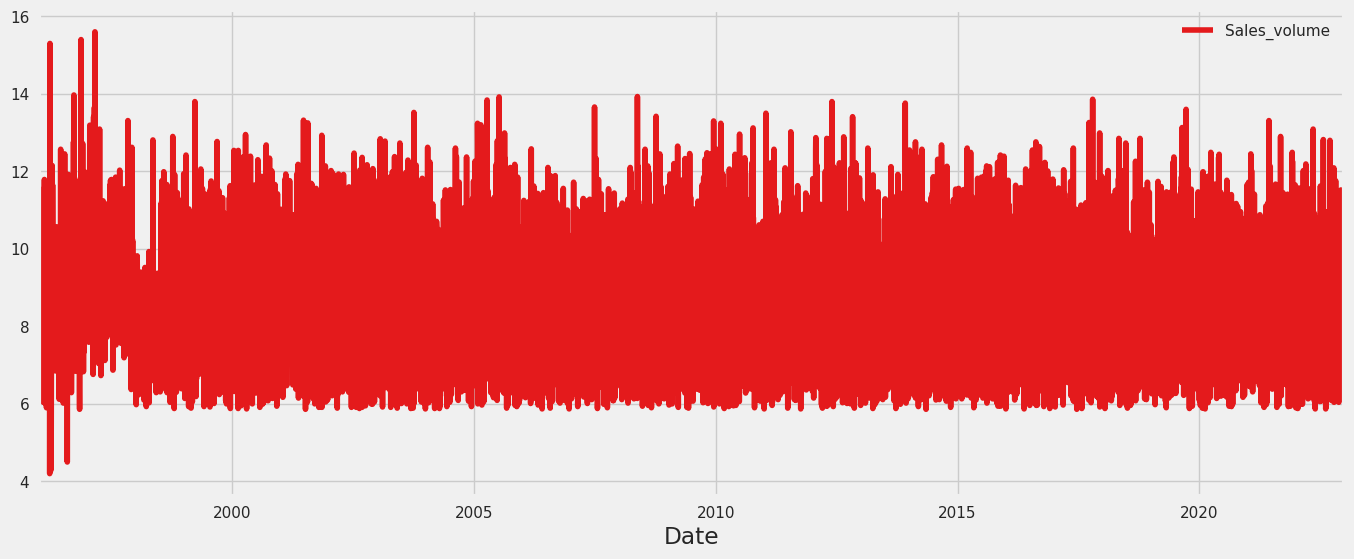

In [152]:
clean_data.plot(figsize=(15, 6))
plt.show()

In [153]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import rcParams

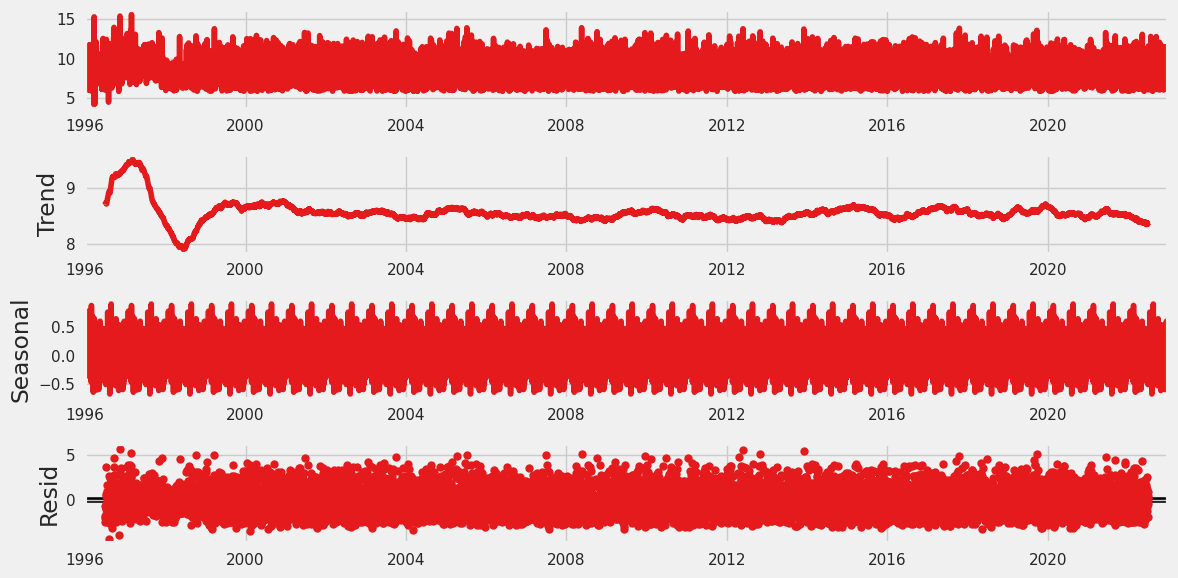

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
decomposition = sm.tsa.seasonal_decompose(clean_data, model='additive', period = 365)
fig = decomposition.plot()
plt.show()

In [155]:
from statsmodels.tsa.stattools import adfuller

In [156]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value:{:.20f} '.format(result[1]))
    if result[1] <= 0.05:
         print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
         print("weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary")

In [157]:
adf_test(clean_data['Sales_volume'])

ADF Statistics: -11.288409411119998
p- value:0.00000000000000000001 
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [158]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

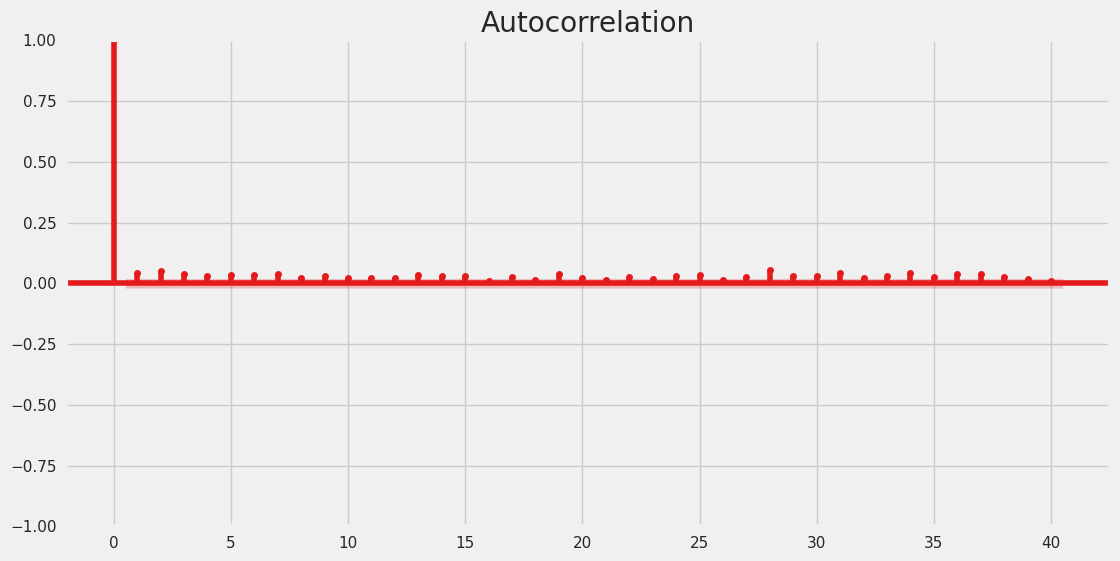

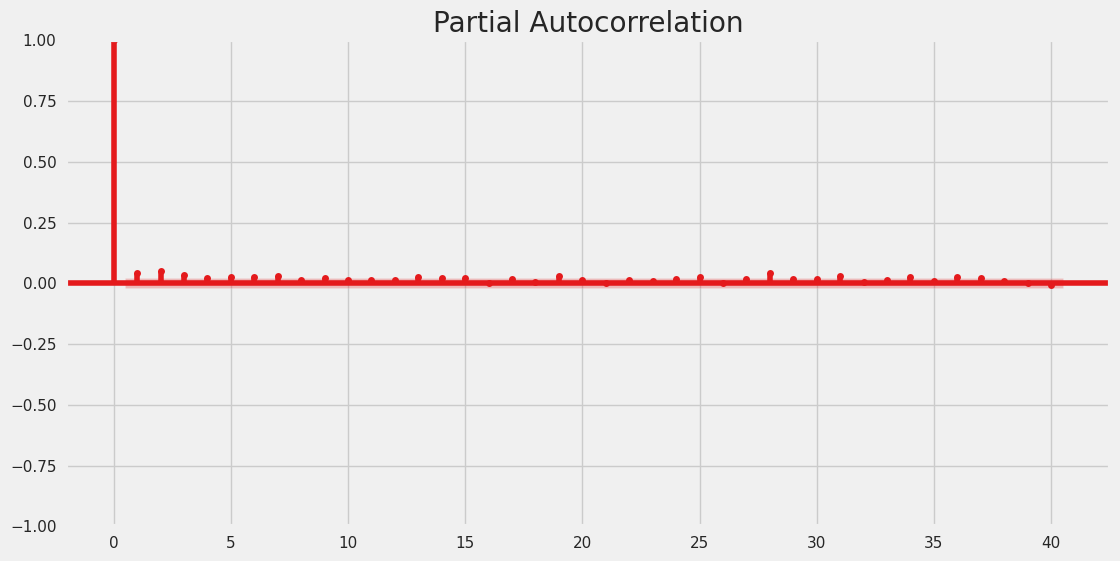

In [159]:
acf = plot_acf(clean_data['Sales_volume'].dropna())
pacf = plot_pacf(clean_data['Sales_volume'].dropna())

In [160]:
## Use Techniques Differencing
#clean_data['Frist_diff_Sales_volume']=clean_data['Sales_volume']-clean_data['Sales_volume'].shift(1)

In [161]:
#acf = plot_acf(clean_data['Frist_diff_Sales_volume'].dropna())
#pacf = plot_pacf(clean_data['Frist_diff_Sales_volume'].dropna())

In [162]:
from datetime import datetime,timedelta


In [163]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_data, test_data = train_test_split(clean_data, test_size=0.2, shuffle=False)

In [164]:
# Print the sizes of the train and test sets
print("Train set size:", len(train_data))
print("Test set size:", len(test_data))

Train set size: 7889
Test set size: 1973


In [165]:
train_dataset_end=datetime(2017,12,1)
test_dataset_end=datetime(2023,12,1)
train_dataset_end

datetime.datetime(2017, 12, 1, 0, 0)

In [166]:
train_data=clean_data[:train_dataset_end]
test_data=clean_data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [167]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

##ARIMA

In [168]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [169]:
mod = ARIMA(train_data['Sales_volume'], order=(1, 1, 1))
model_Arima_fit= mod.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Sales_volume   No. Observations:                 8006
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14675.347
Date:                Fri, 07 Apr 2023   AIC                          29356.693
Time:                        11:00:51   BIC                          29377.657
Sample:                    01-01-1996   HQIC                         29363.868
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0164      0.011      1.458      0.145      -0.006       0.038
ma.L1         -0.9822      0.002   -442.668      0.000      -0.987      -0.978
sigma2         2.2893      0.037     61.983      0.000       2.217       2.362
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               283.40
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.46
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

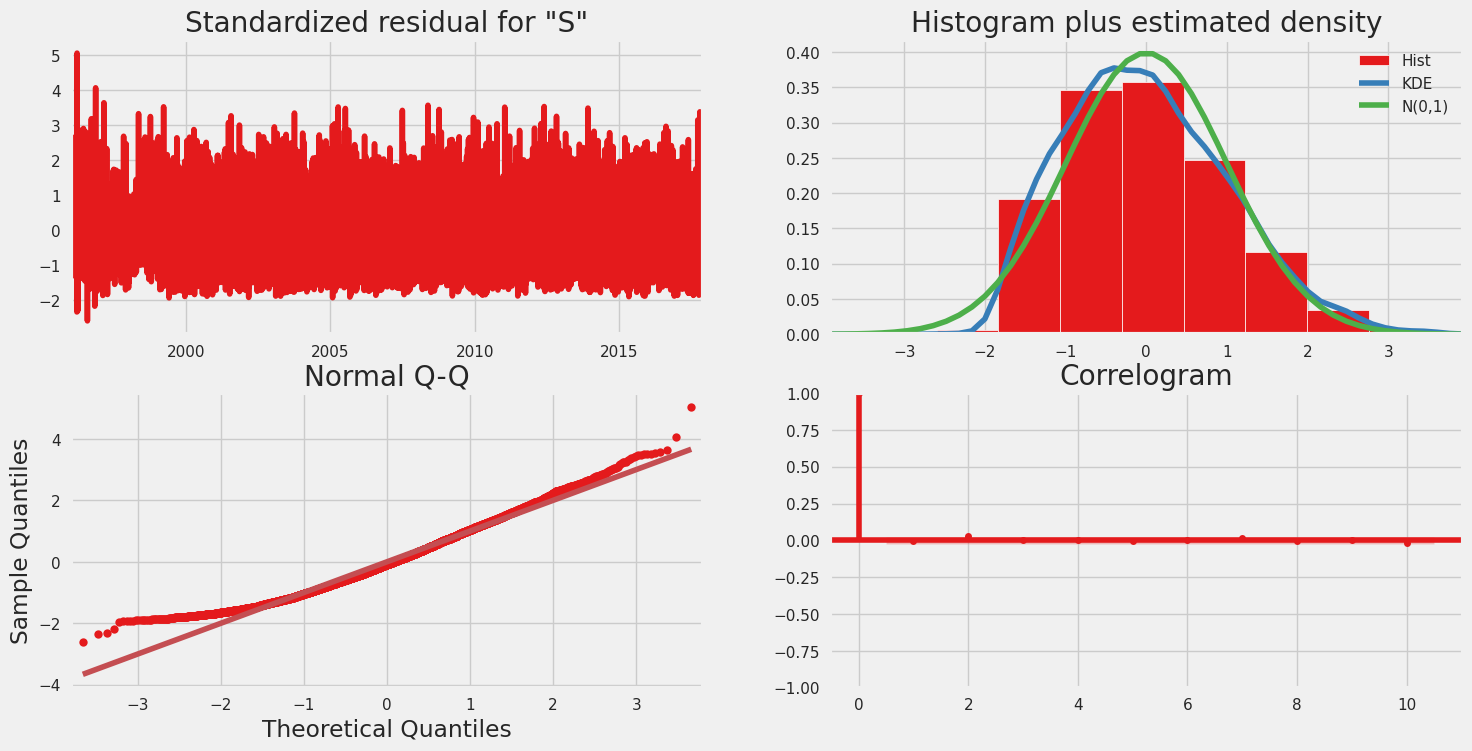

In [170]:
model_Arima_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [171]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2017-12-02 00:00:00
2022-12-31 00:00:00


In [172]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Sales_volume']-pred
pred


2017-12-02    8.700733
2017-12-03    8.715992
2017-12-04    8.716242
2017-12-05    8.716247
2017-12-06    8.716247
                ...   
2022-12-27    8.716247
2022-12-28    8.716247
2022-12-29    8.716247
2022-12-30    8.716247
2022-12-31    8.716247
Freq: D, Name: predicted_mean, Length: 1856, dtype: float64

2023-01-01    8.716247
2023-01-02    8.716247
2023-01-03    8.716247
2023-01-04    8.716247
2023-01-05    8.716247
                ...   
2024-12-27    8.716247
2024-12-28    8.716247
2024-12-29    8.716247
2024-12-30    8.716247
2024-12-31    8.716247
Freq: D, Name: predicted_mean, Length: 731, dtype: float64


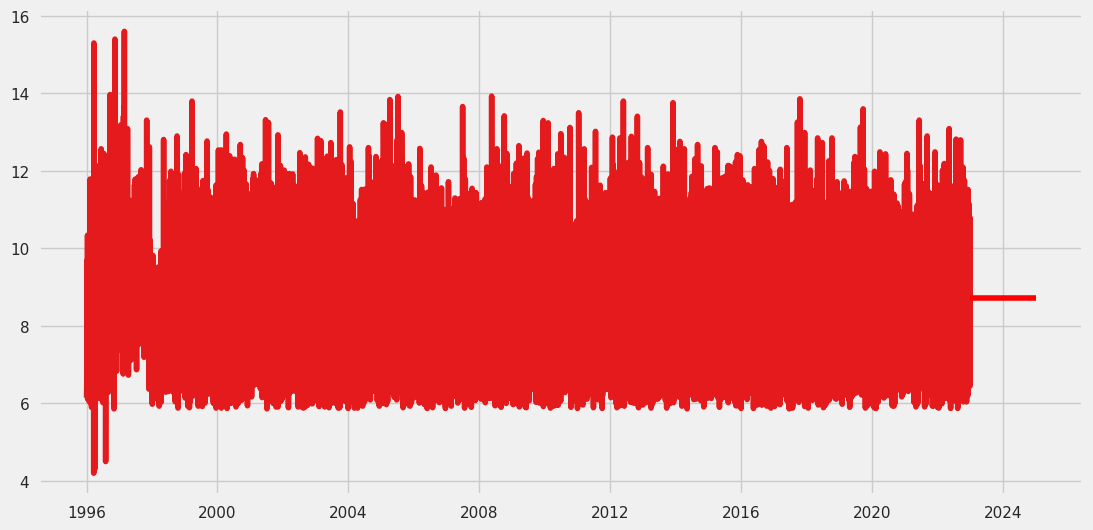

In [173]:
start_index = len(clean_data.Sales_volume)
start_index
end_index = start_index + 730
forecast_test = model_Arima_fit.predict(start = start_index, end = end_index)

print(forecast_test)
# plot forecasts against actual outcomes
import matplotlib.pyplot as plt
plt.plot(clean_data.Sales_volume)
plt.plot(forecast_test, color = 'red')

<Axes: ylabel='Density'>

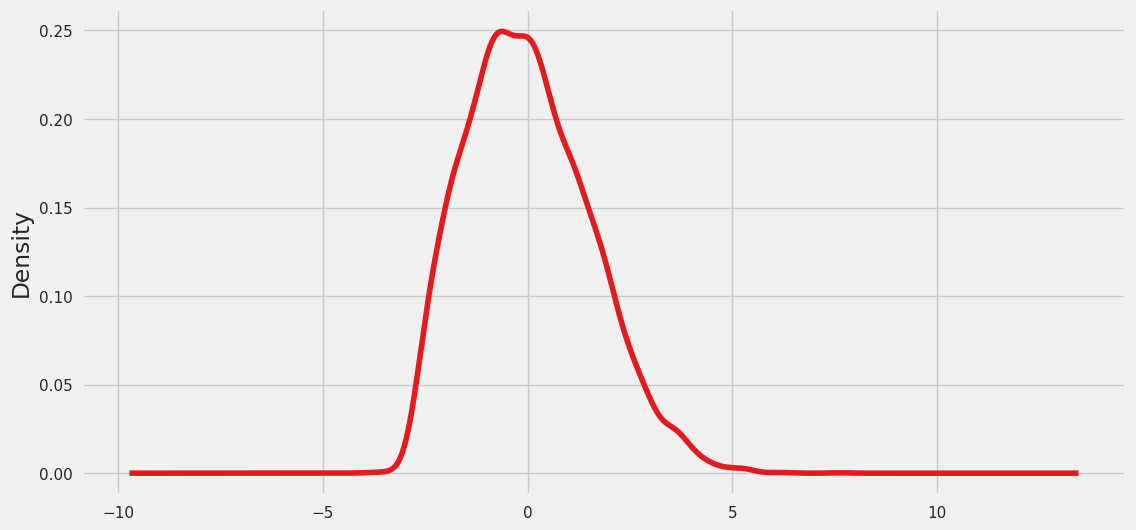

In [174]:
model_Arima_fit.resid.plot(kind='kde')

<Axes: xlabel='Date'>

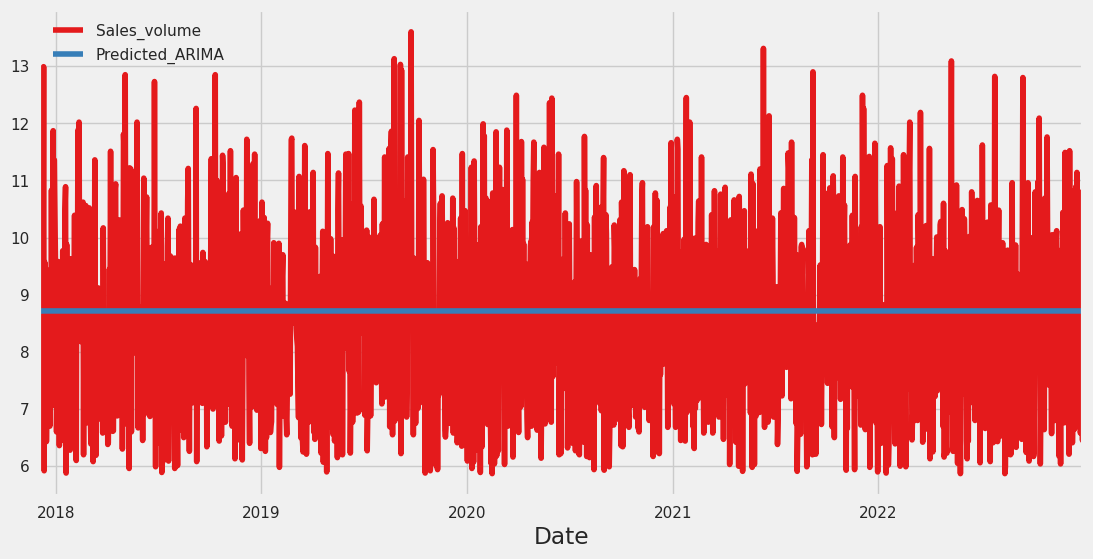

In [175]:
test_data['Predicted_ARIMA']=pred
test_data[['Sales_volume','Predicted_ARIMA']].plot()

In [176]:
# import required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 
import sklearn.metrics as metrics
from math import sqrt

In [177]:
rmse = sqrt(mean_squared_error(test_data.Sales_volume, pred))
print('Test RMSE: %.3f' % rmse)
mape = sqrt( mean_absolute_error(test_data.Sales_volume, pred)*100)
print('Test RMSE: %.3f' % mape)

Test RMSE: 1.527
Test RMSE: 11.218




## SARIMAX





In [178]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [179]:
model_SARIMAX = SARIMAX(train_data['Sales_volume'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
SARIMAX_fit = model_SARIMAX.fit()
SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Sales_volume   No. Observations:                 8006
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -14696.899
Date:                            Fri, 07 Apr 2023   AIC                          29403.797
Time:                                    11:02:03   BIC                          29438.729
Sample:                                01-01-1996   HQIC                         29415.754
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0160      0.011      1.420      0.156      -0.006       0.038
ma.L1         -0.9819      0.002   -404.406      0.000      -0.987      -0.977
ar.S.L12      -0.0023      0.011     -0.203      0.839      -0.024       0.020
ma.S.L12      -0.9996      0.012    -84.774      0.000      -1.023      -0.976
sigma2         2.2919      0.047     49.111      0.000       2.200       2.383
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               281.55
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.46
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [180]:
pred_Sarimax=SARIMAX_fit.predict(start=pred_start_date,end=pred_end_date)
residuals_Sarimax=test_data['Sales_volume']-pred_Sarimax

In [181]:
pred_Sarimax


2017-12-02    8.774477
2017-12-03    8.698794
2017-12-04    8.717655
2017-12-05    8.737098
2017-12-06    8.726343
                ...   
2022-12-27    8.931532
2022-12-28    8.917529
2022-12-29    8.845853
2022-12-30    8.880482
2022-12-31    8.975023
Freq: D, Name: predicted_mean, Length: 1856, dtype: float64

In [182]:
residuals_Sarimax

Date
2017-12-02   -2.634477
2017-12-03    2.001206
2017-12-04    0.642345
2017-12-05   -2.327098
2017-12-06   -1.256343
                ...   
2022-12-27   -2.311532
2022-12-28    0.882471
2022-12-29    1.954147
2022-12-30   -2.430482
2022-12-31   -1.155023
Length: 1856, dtype: float64

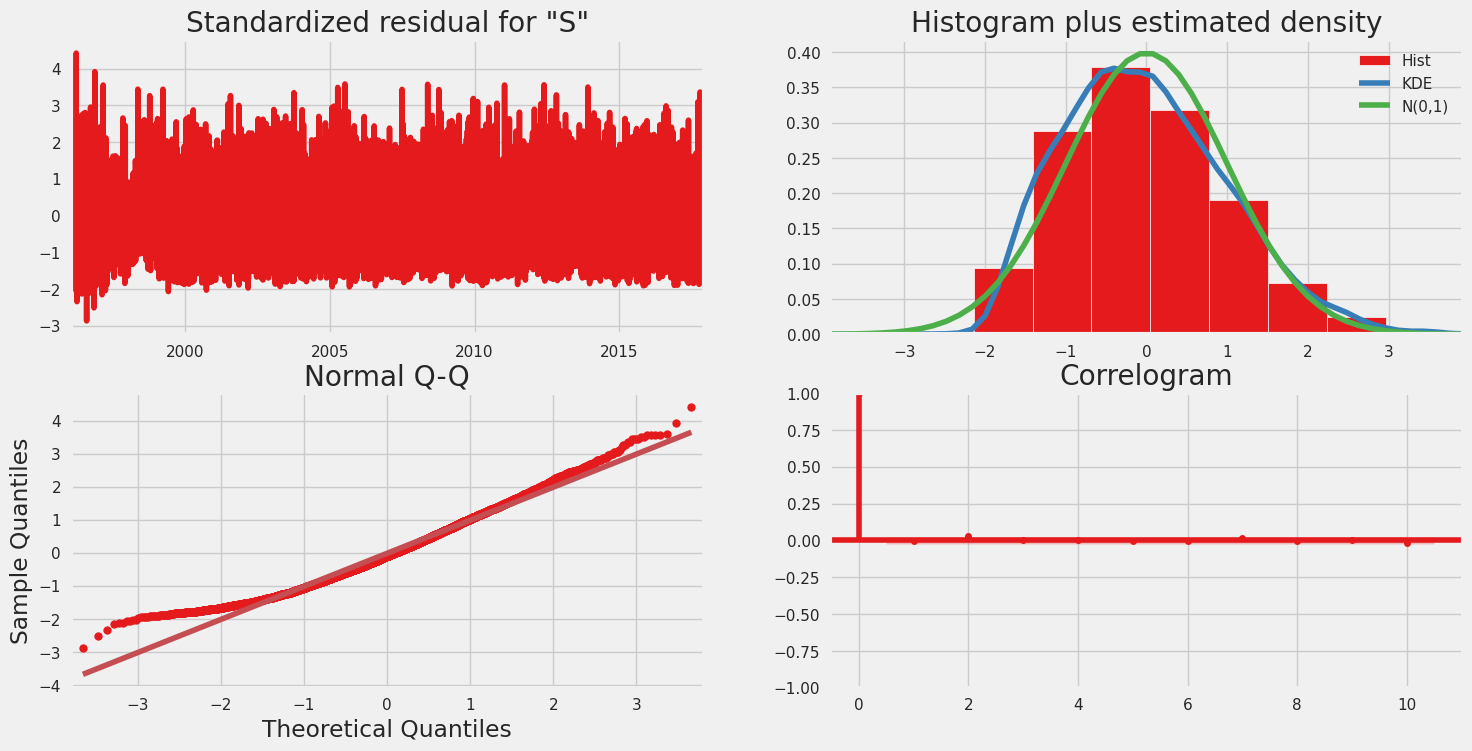

In [183]:
SARIMAX_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

2023-01-01    8.932541
2023-01-02    8.860430
2023-01-03    8.930940
2023-01-04    8.947966
2023-01-05    8.988736
                ...   
2036-09-05    9.513315
2036-09-06    9.413869
2036-09-07    9.434224
2036-09-08    9.457372
2036-09-09    9.443369
Freq: D, Name: predicted_mean, Length: 5001, dtype: float64


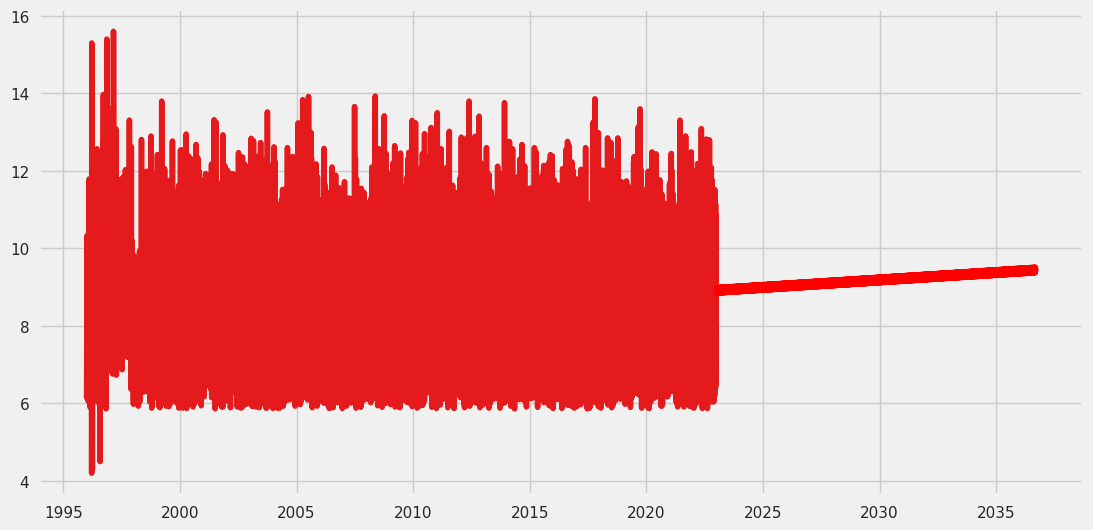

In [184]:
start_index = len(clean_data.Sales_volume)
start_index
end_index = start_index + 5000
forecast_test = SARIMAX_fit.predict(start = start_index, end = end_index)

print(forecast_test)
# plot forecasts against actual outcomes
import matplotlib.pyplot as plt
plt.plot(clean_data.Sales_volume)
plt.plot(forecast_test, color = 'red')

In [185]:
test_data['Predicted_SARIMAX']=pred_Sarimax
test_data[['Sales_volume', 'Predicted_SARIMAX']]


,Sales_volume,Predicted_SARIMAX
Date,,
2017-12-02,6.14,8.774477
2017-12-03,10.70,8.698794
2017-12-04,9.36,8.717655
2017-12-05,6.41,8.737098
2017-12-06,7.47,8.726343
...,...,...
2022-12-27,6.62,8.931532
2022-12-28,9.80,8.917529
2022-12-29,10.80,8.845853


<Axes: xlabel='Date'>

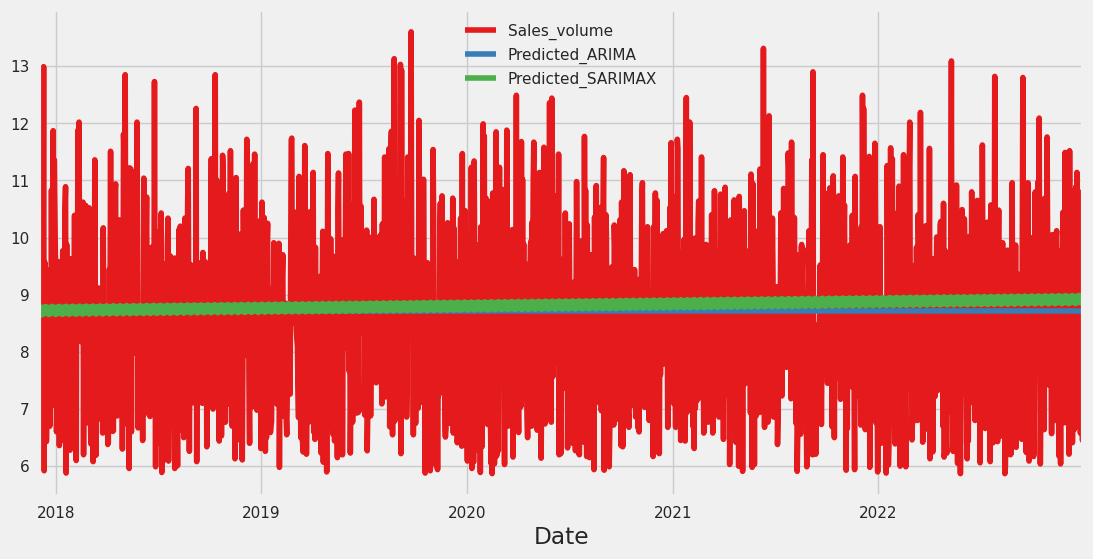

In [186]:
test_data[['Sales_volume','Predicted_ARIMA', 'Predicted_SARIMAX']].plot()

In [187]:
rmse = sqrt(mean_squared_error(test_data.Sales_volume, pred_Sarimax))#sarimax
print('Test RMSE: %.3f' % rmse)
mape = sqrt( mean_absolute_error(test_data.Sales_volume,pred_Sarimax)*100)
print('Test mape: %.3f' % mape)

Test RMSE: 1.548
Test mape: 11.307


In [188]:
rmse = sqrt(mean_squared_error(test_data.Sales_volume, pred))#arima
print('Test RMSE: %.3f' % rmse)
mape = sqrt( mean_absolute_error(test_data.Sales_volume, pred)*100)
print('Test RMSE: %.3f' % mape)

Test RMSE: 1.527
Test RMSE: 11.218


In [189]:
# Saving the best model

pickle.dump(model_Arima_fit, open('SARIMAX.pkl', 'wb'))

In [190]:
import os

os.getcwd()

'/content'

Shape of your Data Set loaded: (9862, 1)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Sales_volume,721,float64,0,0.000000,7.310890,0,


    1 Predictors classified...
        No variables removed since no ID or low-information variables found in data set


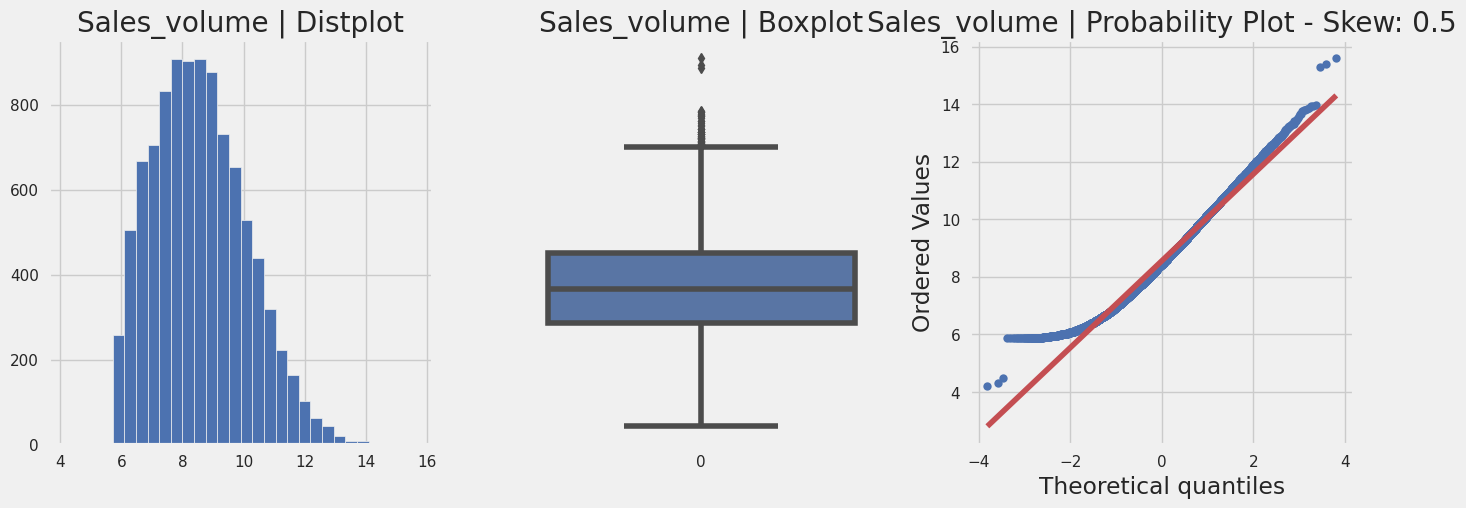

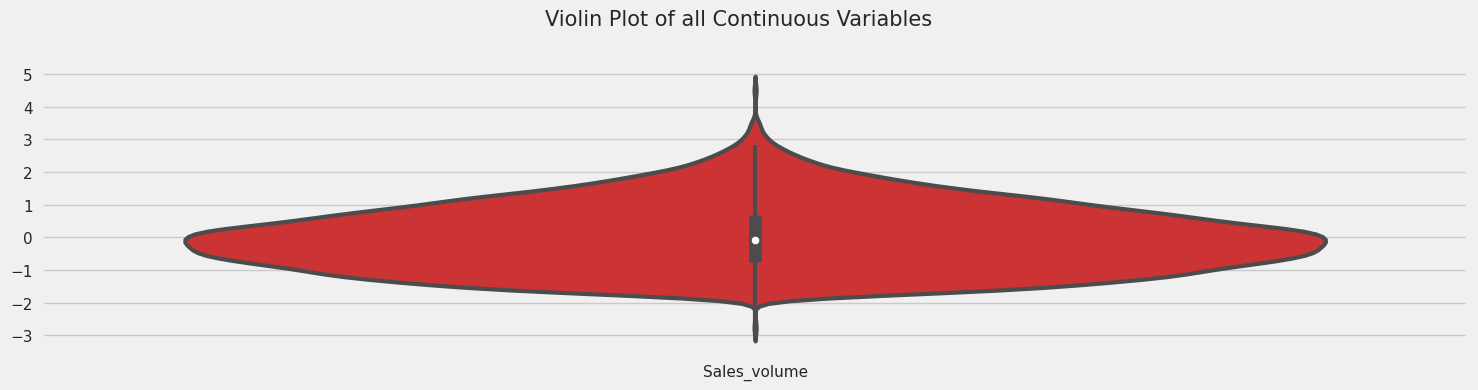

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Sales_volume
Date,
1996-01-01,6.15
1996-01-02,6.38
1996-01-03,6.47
1996-01-04,7.47
1996-01-05,7.91
...,...
2022-12-27,6.62
2022-12-28,9.80
2022-12-29,10.80


In [191]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=clean_data)